<a href="https://colab.research.google.com/github/DAN-BIWOTT/Machine-learning-in-finance/blob/main/JPYUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis
To start our analysis, let us first import the libraries we need.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now we will read in the market data.

In [2]:
#Read in the data
data = pd.read_csv("Market Data USDJPY.csv")
data.head(3)

,Time,Open,High,Low,Close
0,1970.01.01 00:00:00,0.0,0.0,0.0,0.0
1,1970.01.01 00:00:00,0.0,0.0,0.0,0.0
2,1970.01.01 00:00:00,0.0,0.0,0.0,0.0


Our data is arranged in the wrong order, reverse it.



In [3]:
#The data is in reverse order, correct that
data = data[::-1]
# Reduce the dataset to the first 10,000 rows
data = data.head(10000)
data.head(3)

,Time,Open,High,Low,Close
99999,2024.08.21 04:30:00,145.403,145.586,145.346,145.438
99998,2024.08.21 04:15:00,145.437,145.481,145.254,145.403
99997,2024.08.21 04:00:00,145.450,145.582,145.314,145.436


Define how far into the future we wish to forecast.



In [4]:
#Define the forecast horizon
look_ahead = 15

### **Idea:**
My goal is to calculate the "angle" of price changes to determine market trends (bullish or bearish). A positive angle suggests an upward (bullish) trend, and a negative angle suggests a downward (bearish) trend.

### **Common Approach:**
1. **Trend Lines:** Traders draw lines connecting key price points (like peaks or troughs) to identify trends.
2. **Slope Formula:** The slope of these trend lines is calculated as the change in price divided by the change in time.

### **Problems with the Common Approach:**
1. **Subjectivity:** Traders often draw trend lines in ways that match their opinions, which may not be accurate.
2. **Market Hours:** Time calculations ignore weekends (when markets are closed), leading to errors in slope estimation.
3. **Inconsistency:** Depending on how time is represented, slope values can differ for the same data.

### **Proposed Solution:**
- Instead of using time on the x-axis, calculate the slope as:  
  slope=
change in open price /
change in close price
​

### **Advantages of the New Approach:**
1. Removes time (and weekend gaps) from the equation.
2. Gives insight into how sensitive closing prices are to changes in opening prices:
   - If the value is **> 1**, large changes in the open price have little effect on the close price.
   - If the value is **< 1**, small changes in the open price have a big effect on the close price.
   - A **negative slope** means open and close prices move in opposite directions.

### **New Challenges:**
1. **Doji Candles:** When open and close prices are almost the same, the slope calculation can produce extreme values or errors (like dividing by zero).
2. **Clusters of Dojis:** Multiple Dojis in a row can distort the calculation, making it unreliable.

In [5]:
#Calculate the angle formed by the changes in price, using a ratio of high and low price.
#Then calculate arctan to realize the angle formed by the changes in pirce
data["Slope"] =  (data["Close"] - data["Close"].shift(look_ahead))/(data["Open"] - data["Open"].shift(look_ahead))
data["Angle"] =  np.arctan(data["Slope"])

data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Open,High,Low,Close,Slope,Angle
count,10000.000000,10000.000000,10000.000000,10000.000000,9985.000000,9985.000000
mean,154.904513,154.958901,154.845098,154.904144,NaN,0.592660
std,4.110698,4.092397,4.130079,4.111718,NaN,0.604064
min,141.974000,142.197000,141.689000,141.965000,-inf,-1.570796
25%,152.842000,152.908000,152.757750,152.840500,0.556213,0.507601
50%,155.714000,155.754000,155.663000,155.714000,0.928571,0.748378
75%,157.334000,157.372250,157.287500,157.338000,1.276817,0.906385
max,161.939000,161.950000,161.917000,161.939000,inf,1.570796


Let's zoom in on the instances where our slope calculation evaluated to infinity.



In [6]:
data.loc[data["Slope"] == np.inf]


,Time,Open,High,Low,Close,Slope,Angle
97644,2024.07.17 15:45:00,156.485,156.610,156.483,156.563,inf,1.570796
96208,2024.06.26 05:00:00,159.782,159.875,159.773,159.854,inf,1.570796
96205,2024.06.26 04:15:00,159.752,159.805,159.751,159.778,inf,1.570796
96001,2024.06.24 01:15:00,159.692,159.765,159.692,159.765,inf,1.570796
95370,2024.06.13 11:30:00,157.243,157.271,157.222,157.258,inf,1.570796
94835,2024.06.05 21:45:00,156.074,156.126,156.069,156.096,inf,1.570796
94828,2024.06.05 20:00:00,156.121,156.132,156.075,156.091,inf,1.570796
94354,2024.05.29 21:30:00,157.653,157.672,157.645,157.666,inf,1.570796
93934,2024.05.23 12:30:00,156.710,156.730,156.688,156.712,inf,1.570796
93891,2024.05.23 01:45:00,156.758,156.760,156.726,156.741,inf,1.570796


In the plot below, we randomly selected one of the instances where our slope calculation was infinite. The plot shows that these records map to price fluctuations, whereby the Open price did not change.



Text(0.5, 1.0, 'A slope of INF means the price has not changed')

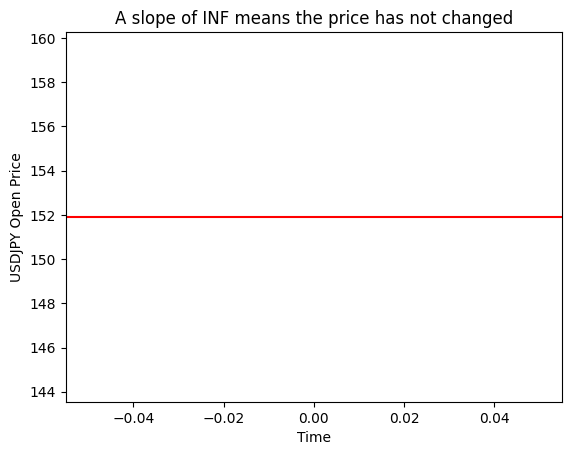

In [7]:
pt = 90764
y = data.loc[pt,"Open"]
plt.plot(data.loc[(pt - look_ahead):pt,"Open"])
plt.axhline(y=y,color="red")
plt.xlabel("Time")
plt.ylabel("USDJPY Open Price")
plt.title("A slope of INF means the price has not changed")

We will simplify this by dropping all missing values.



In [8]:
data.dropna(inplace=True)

Now, let us reset the index of our data.



In [9]:
data.reset_index(drop=True,inplace=True)


Let us plot our angle calculations. As we can see in the figure below, our angle calculation revolves around 0, this may give the computer some sense of scale because the further we drift away from 0, the greater the change in price levels.



<Axes: >

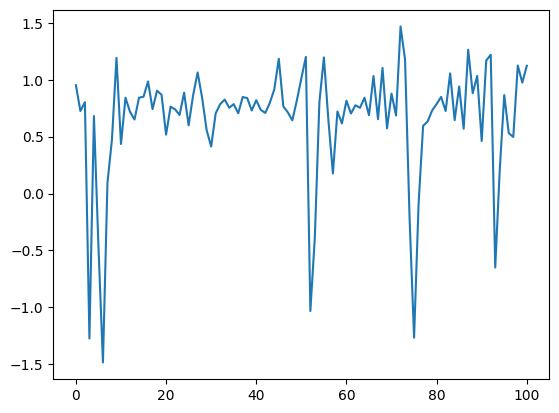

In [10]:
data.loc[:100,"Angle"].plot()


Let us now try and estimate the noise in the new feature we have created. We will quantify noise to be the number of times the angle created by price decreased but price levels increased over the same time. This property is undesirable because ideally, we would love a quantity that increases and decreases agreeing with price levels. Unfortunately, our new calculation moves in step with price half of the time, and the other half they may move independently.



To quantify this, we simply counted the number of rows where the slope of the price increased and the future price levels decreased. And we divided this count by the total number of instances where the slope increased. This tells us that, knowing the future value of the slope of the line, tells us very little about the changes in price levels that would have occurred over that same forecast horizon.



In [11]:
#How clean are the signals generated?
1 - (data.loc[(data["Slope"] < data["Slope"].shift(-look_ahead)) & (data["Close"] > data["Close"].shift(-look_ahead))].shape[0] / data.loc[(data["Slope"] < data["Slope"].shift(-look_ahead))].shape[0])


0.44659600489196905

Exploratory Data Analysis
First, we must define our inputs and outputs.



In [12]:
#Define our inputs and target
ohlc_inputs      = ["Open","High","Low","Close"]
trig_inputs      = ["Angle"]
all_inputs       = ohlc_inputs + trig_inputs
cv_inputs        = [ohlc_inputs,trig_inputs,all_inputs]
target           = "Target"

Now we define the classical target, the future price.



In [13]:
#Define the target
data["Target"] = data["Close"].shift(-look_ahead)

Let's also add a few categories to tell our model about the price action that created each candle. If the current candle is the result of a bullish move that happened over the past 20 candles, we will symbolize that with a categorical value set to 1. Otherwise, the value will be set to 0. We will perform the same labeling technique for our angle changes.



In [14]:
#Add a few labels
data["Bull Bear"] = np.nan
data["Angle Up Down"] = np.nan

data.loc[data["Close"] > data["Close"].shift(look_ahead), "Bull Bear"] = 0
data.loc[data["Angle"] > data["Angle"].shift(look_ahead),"Angle Up Down"] = 0
data.loc[data["Close"] < data["Close"].shift(look_ahead), "Bull Bear"] = 1
data.loc[data["Angle"] < data["Angle"].shift(look_ahead),"Angle Up Down"] = 1

Formatting the data.



In [15]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data

,Time,Open,High,Low,Close,Slope,Angle,Target,Bull Bear,Angle Up Down
0,2024.08.20 21:00:00,145.484,145.534,145.473,145.475,1.140893,0.851114,145.743,0.0,1.0
1,2024.08.20 20:45:00,145.394,145.488,145.387,145.486,1.507692,0.985152,146.094,0.0,0.0
2,2024.08.20 20:30:00,145.433,145.434,145.354,145.394,0.917073,0.742168,146.108,0.0,1.0
3,2024.08.20 20:15:00,145.417,145.455,145.416,145.433,1.270270,0.903888,146.151,0.0,0.0
4,2024.08.20 20:00:00,145.394,145.465,145.343,145.416,1.180556,0.868012,146.078,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9930,2024.03.27 16:45:00,151.277,151.277,151.211,151.249,1.184211,0.869536,151.105,1.0,1.0
9931,2024.03.27 16:30:00,151.236,151.297,151.222,151.277,0.832117,0.694020,151.198,1.0,0.0
9932,2024.03.27 16:15:00,151.281,151.317,151.233,151.235,1.266055,0.902272,151.167,1.0,0.0
9933,2024.03.27 16:00:00,151.325,151.352,151.280,151.281,1.730159,1.046724,151.205,1.0,0.0


from matplotlib import pyplot as plt
data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Close', y='Slope', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

Let us analyze the correlation levels in our data. When we estimated the noise levels associated with the new angle calculation, we observed that price and the angle calculation are only in harmony about 50% of the time. Therefore, the poor correlation levels we observed below should come as no surprise.



<Axes: >

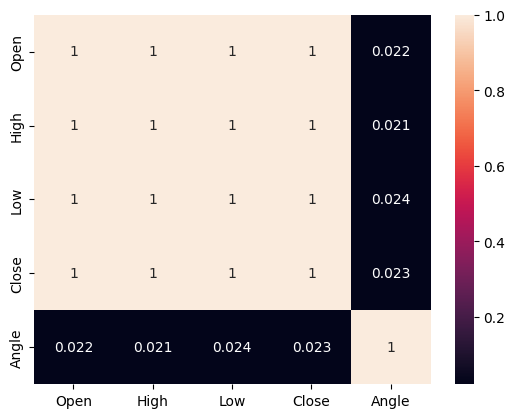

In [16]:
#Let's analyze the correlation levels
sns.heatmap(data.loc[:,all_inputs].corr(),annot=True)

Let us also try creating a scatter-plot of the Angle created by price on the x-axis and the Close price on the y-axis. The results obtained are not promising. There is excessive overlap between the instances where price levels fell, the blue dots, and the instances where price levels increased. This makes it challenging for our machine learning models to estimate the mappings between the 2 possible classes of price movements.



<Axes: xlabel='Angle', ylabel='Close'>

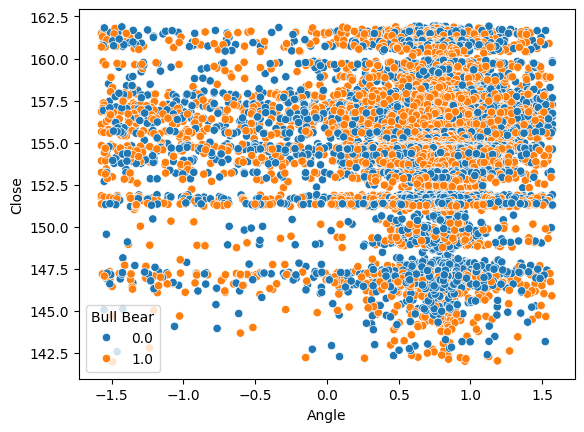

In [17]:
sns.scatterplot(data=data,y="Close",x="Angle",hue="Bull Bear")


If we perform a scatter-plot of our 2 engineered features, the Slope and the Angle calculations, against each other, we can clearly observe the non-linear transformation we have applied to the data. Most of our data lies in between the 2 curved ends of the data, and unfortunately, there is no partition between the bullish and bearish price action that may give us an advantage in forecasting future price levels.



<Axes: xlabel='Angle', ylabel='Slope'>

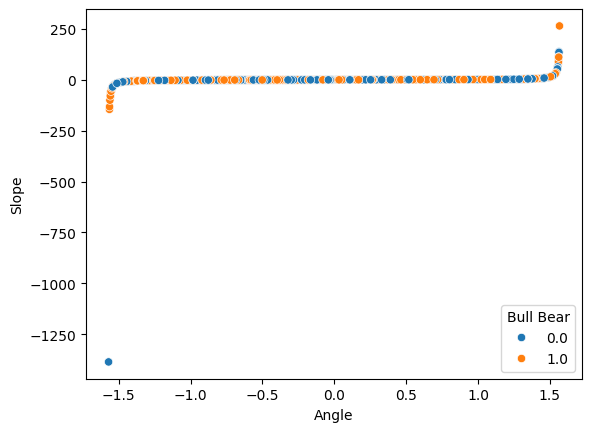

In [18]:
sns.scatterplot(data=data,x="Angle",y="Slope",hue="Bull Bear")


Let us visualize the noise we estimated at 51% earlier. Let's perform a plot with 2 values on our x-axis. Each value will symbolize whether the angle calculation increased or decreased, respectively. Our y-axis will record the closing price and each of the dots will summarize whether price levels appreciated or depreciated in the same manner that we outlined earlier, blue instances summarize points where future price levels fell.
At first, we estimated the noise, but now we can visualize it. We can clearly see from the graph below, that changes in future price levels appear to have nothing to do with the changes in the angle created by price.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Angle Up Down', ylabel='Close'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


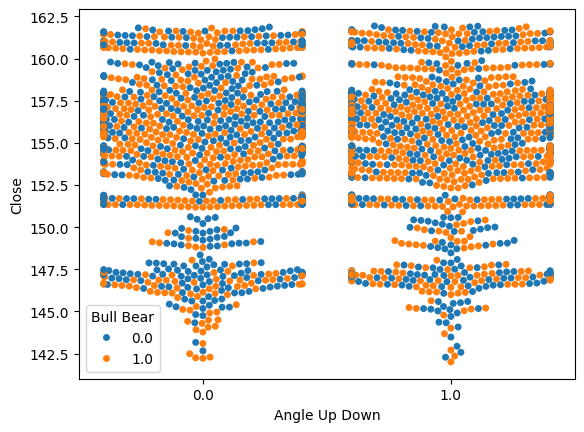

In [19]:
import seaborn as sns
import pandas as pd

# Reduce the dataset by 70%
reduced_data = data.sample(frac=0.30, random_state=42)  # Adjust random_state for reproducibility

# Visualize the reduced dataset
sns.swarmplot(data=reduced_data, x="Angle Up Down", y="Close", hue="Bull Bear")


Visualizing the data in 3D shows just how noisy the signal is. We would expect to at least observe a few clusters of points that were all bullish or bearish. However, in this particular instance, we have none. The presence of clusters could possibly identify a pattern that could be interpreted as a trading signal.



Text(0.5, 0, 'Close')

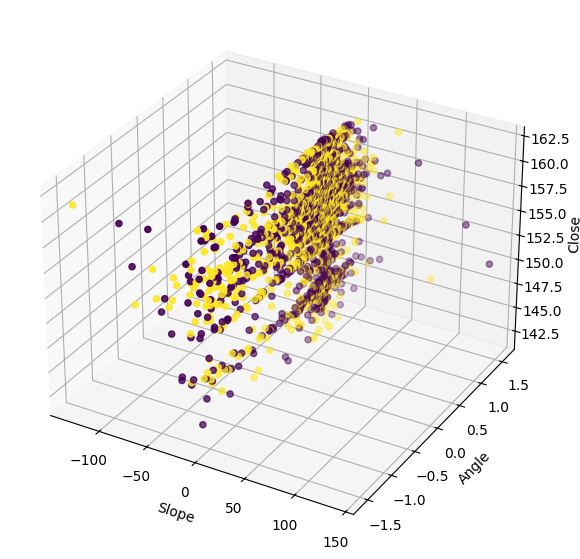

In [20]:
#Define the 3D Plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.scatter(reduced_data["Slope"],reduced_data["Angle"],reduced_data["Close"],c=reduced_data["Bull Bear"])
ax.set_xlabel("Slope")
ax.set_ylabel("Angle")
ax.set_zlabel("Close")

The violin plot allows us to visually compare 2 distributions. The violin plot has a box-plot at its core, to summarize the numerical properties of each distribution. The graph below gives us hope that the angle calculation is not a waste of time. Each box plot has its average value outlined with a white line. We can clearly see that across both instances of angle movements, the average values of each box-plot were slightly different. While this slight difference may appear insignificant to us as humans, our machine learning models are sensitive enough to pick up and learn from such discrepancies in the distribution of the data.



<Axes: xlabel='Angle Up Down', ylabel='Close'>

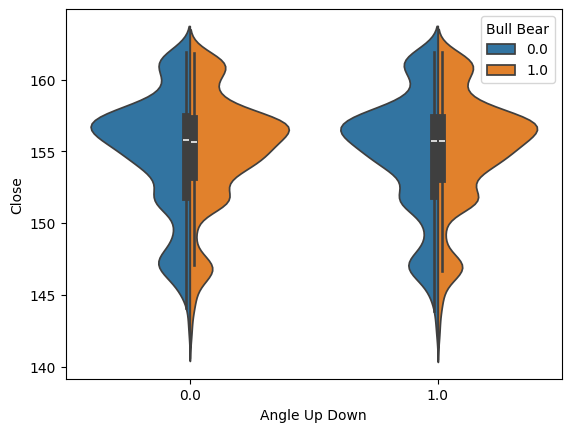

In [21]:
sns.violinplot(data=data,x="Angle Up Down",y="Close",hue="Bull Bear",split=True)


Preparing To Model The Data
Let us now try and model our data. First, we shall import the libraries we need.

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

Split the data into train, test splits.



In [23]:
#Let's split our data into train test splits
train_data, test_data = train_test_split(data,test_size=0.5,shuffle=False)

Scaling the data will help our models learn effectively. I ensured that I only fit the scaler object on the train set, and then transform the test set without fitting the scaler object a second time.


In [24]:
#Scale the data
scaler = StandardScaler()
scaler.fit(train_data[all_inputs])
train_scaled= pd.DataFrame(scaler.transform(train_data[all_inputs]),columns=all_inputs)
test_scaled = pd.DataFrame(scaler.transform(test_data[all_inputs]),columns=all_inputs)

Define a data-frame to store the accuracy of each model.



In [25]:
#Create a dataframe to store our accuracy in training and testing
columns = [
    "Random Forest",
    "Bagging",
    "Gradient Boosting",
    "AdaBoost",
    "Linear SVR",
    "Linear Regression",
    "Ridge",
    "Lasso",
    "Elastic Net",
    "K Neighbors",
    "Decision Tree",
    "Neural Network"
]
index = ["OHLC","Angle","All"]
accuracy = pd.DataFrame(columns=columns,index=index)

Store the models in a list.



In [26]:
#Store the models
models = [
  RandomForestRegressor(),
  BaggingRegressor(),
  GradientBoostingRegressor(),
  AdaBoostRegressor(),
  LinearSVR(),
  LinearRegression(),
  Ridge(),
  Lasso(),
  ElasticNet(),
  KNeighborsRegressor(),
  DecisionTreeRegressor(),
  MLPRegressor(hidden_layer_sizes=(4,6))
]


Cross-validate each model. </br>
We systematically evaluates different model and feature combinations using cross-validation to find the best performing setup for predicting the target variable, which is the future price in this context. By using cross-validation, it provides a more robust assessment of the model's ability to generalize to unseen data compared to simply training and testing on a single split of the data.


In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarning for readability
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Cross-validate the models
for k in np.arange(0, len(cv_inputs)):
    current_inputs = cv_inputs[k]
    # Iterate through each model
    for i in np.arange(0, len(models)):
        # Set higher max_iter for ElasticNet-like models
        if hasattr(models[i], "max_iter"):
            models[i].set_params(max_iter=10000)
        # Perform cross-validation
        score = cross_val_score(
            models[i],
            train_scaled[current_inputs],
            train_data[target],
            cv=5,
            scoring="neg_mean_squared_error",
            n_jobs=-1
        )
        accuracy.iloc[k, i] = -score.mean()

display(accuracy)

,Random Forest,Bagging,Gradient Boosting,AdaBoost,Linear SVR,Linear Regression,Ridge,Lasso,Elastic Net,K Neighbors,Decision Tree,Neural Network
OHLC,0.924345,0.873882,0.816309,2.169351,0.236862,0.237204,0.24264,3.691216,3.437042,0.883508,0.98818,0.28633
Angle,56.066792,56.860371,44.031576,37.647297,41.443566,43.493004,43.492998,43.472847,43.472847,48.541881,70.152631,43.598986
All,0.954018,0.971498,0.819409,2.006065,0.237785,0.237325,0.242798,3.691216,3.437042,1.032064,0.970677,0.39221


We tested the models using 3 sets of inputs:

1.   Just the OHLC prices.
2.   Just the slope and angle created.
3.   All the data we had.


Not all our models were able to effectively use our features. From the 12 models in our pool of candidates, the KNeighbors model gained a bit of improvement in performance from our new features and was clearly the best model we had at this point.

While our linear regression is the best model from the entire pool, this demonstration suggests that there may be other transformations we are simply not aware of that could lower our accuracy levels even further.

Deeper Optimization
Let us try and find better settings for our indicator than the default settings it comes with.

In [28]:
from sklearn.model_selection import RandomizedSearchCV


Create instances of our model.



In [29]:
model = KNeighborsRegressor(n_jobs=-1)

Define the tuning parameters.


In [30]:
tuner = RandomizedSearchCV(model,
  {
    "n_neighbors": [2,3,4,5,6,7,8,9,10],
    "weights": ["uniform","distance"],
    "algorithm": ["auto","ball_tree","kd_tree","brute"],
    "leaf_size": [1,2,3,4,5,10,20,30,40,50,60,100,200,300,400,500,1000],
    "p": [1,2]
  },
    n_iter = 100,
    n_jobs=-1,
    cv=5
)

Fit the tuner object.



In [31]:
tuner.fit(train_scaled.loc[:,all_inputs],train_data[target])


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 10, 20, 30,
                                                      40, 50, 60, 100, 200, 300,
                                                      400, 500, 1000],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

The best parameters we have found.



In [32]:
tuner.best_params_


{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 9,
 'leaf_size': 2,
 'algorithm': 'kd_tree'}

I don't really care much about the training errors. I am more concerned with how well our model will generalize to new data.



In [33]:
tuner.best_score_


0.6901323310217433

**Testing For Overfitting** </br>
Let's see if I was overfitting to the training set. I shall compare the customized model, against a model that has no prior knowledge about the data.

In [34]:
#Testing for over fitting
model = KNeighborsRegressor(n_jobs=-1)

custom_model = KNeighborsRegressor(n_jobs=-1,weights= 'uniform',p=1,n_neighbors= 10,leaf_size= 100,algorithm='ball_tree')

If we fail to outperform a default instance of the model, we can be confident we may have over customized our model to the training set. We can clearly see that we outperformed the default model, which is good news.



In [35]:
model.fit(train_scaled.loc[:,all_inputs],train_data[target])
custom_model.fit(train_scaled.loc[:,all_inputs],train_data[target])

KNeighborsRegressor(algorithm='ball_tree', leaf_size=100, n_jobs=-1,
                    n_neighbors=10, p=1)

Exporting To ONNX
Open Neural Network Exchange (ONNX) is an open-source protocol for building and sharing machine learning models in a model agnostic manner. We will utilize the ONNX API to export our AI model from Python and import it into an MQL5 program.

First, we need to apply transformations to our price data that we can always reproduce in MQL5. So I'll save the mean and standard deviation values of each column into a CSV file.



In [36]:
data.loc[:,all_inputs].mean().to_csv("USDJPY M1 MEAN.csv")
data.loc[:,all_inputs].std().to_csv("USDJPY M1 STD.csv")

Then apply the transformation on the data.



In [37]:
data.loc[:,all_inputs] = ((data.loc[:,all_inputs] - data.loc[:,all_inputs].mean())/ data.loc[:,all_inputs].std())


Importing/Installing the libraries needed.



In [38]:
pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.1 MB/s eta 0:00:00


In [39]:
pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [40]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

Define the input type of our model.



In [41]:
#Define the input shape
initial_type = [('float_input', FloatTensorType([1, len(all_inputs)]))]

Fit the model on all the data we have.



In [42]:
#Fit the model on all the data we have
custom_model.fit(data.loc[:,all_inputs],data.loc[:,"Target"])

KNeighborsRegressor(algorithm='ball_tree', leaf_size=100, n_jobs=-1,
                    n_neighbors=10, p=1)

Convert the model to ONNX format and save it.



In [43]:
#Convert the model to ONNX format
onnx_model = convert_sklearn(model, initial_types=initial_type,target_opset=12)
#Save the ONNX model
onnx.save(onnx_model,"USDJPY M15 OHLC Angle.onnx")